<h1 style="text-align: center; font-size: 2.3em; color: navy; font-family: Arial, sans-serif; font-weight: bold;">
Astrophysical Techniques – Homework 3 
</h1>

<h2 style="text-align: center; font-size: 2em; color: black; font-family: Arial, sans-serif;">
CCD Equation - Exposure Time Calculator
</h2>

<p style="text-align: center; font-size: 1.2em; font-family: Georgia, serif;">
Master in Astrophysics and Space Science (MASS)-(2024/2025) <br>
Department of Astronomy, University of Belgrade <br>
Instructor: Prof. Dragana Ilić
</p>

<p style="text-align: center; font-size: 1.2em; font-family: Georgia, serif; font-style: italic;">
Report by Nandita Das
</p>

In astronomical imaging, the quality of a CCD observation depends heavily on the signal-to-noise ratio (SNR). Various sources such as background light, thermal noise, and instrumental effects contribute to the noise, while the signal comes from the photons emitted by the observed object.

This homework focuses on understanding and modeling the SNR of a CCD image and computing the **required exposure time** to reach a desired SNR, given parameters of the telescope, CCD, sky brightness, and the source itself.

We implement a Python program that:
- Calculates the exposure time needed for a given SNR,
- Plots how exposure time changes with parameters like source radius, telescope diameter, quantum efficiency, etc.,
- Compares exposure times for point sources and extended sources,
- And applies this to a real-case scenario: imaging the Andromeda Galaxy (M31) with the Milanković telescope.

The main equation used in the calculations is the full SNR expression that includes signal noise, background noise, thermal noise, and read-out noise. We assume default values for most parameters, with flexibility to change them to explore different observing conditions.

## **Task 1: Exposure Time Estimation for a CCD System**

In this task, we implement a Python program that estimates the required exposure time to reach a desired signal-to-noise ratio (SNR) during CCD observations. The calculation is based on the following parameters:

- **Telescope**: mirror diameter `D` and f-number `f/#`
- **CCD Chip**: quantum efficiency `q`, dark current `Sdc`, read-out noise `Sro²`, and pixel size `u`
- **Observed Object**: apparent magnitude `V` and PSF size `r` (in arcseconds)
- **Sky Brightness**: `Bsky`, in mag/arcsec²

We assume:
- A circular aperture of radius `r` (arcseconds) for the source
- Observations are made using the **V filter** with a bandwidth of **900 Å**
- The object is at zenith (`X = 1`)
- The flux of a zero-magnitude source is `f₀ = 1000 e⁻/s/cm²/Å`

Plots are generated to show how exposure time depends on:

1. **SNR = 3, 1003** for `r = {0.01, 0.1, 0.5, 1, 3}` arcsec  
2. **V = 10, 30** for `D = {1, 2.5, 6, 11}` meters  
3. **Bsky = 18, 24** mag/arcsec² for `r = {0.01, 0.1, 0.5, 1, 3}` arcsec  
4. **q = 0.35, 0.99** for `u = {5, 14, 27, 50}` μm

---

### Extended Source Case

We also estimate the exposure time for an extended source (e.g., a galaxy), assuming:
- Brightness `Bsig = 25` mag/arcsec²
- Source spans `4 × 4` CCD pixels
- SNR values of `3` and `1003`
- Pixel counts `n = {4, 15, 70}`

---

### Default Parameters

Unless otherwise stated, the following values are used:

- `D = 8 m`, `q = 0.7`, `V = 25 mag`, `f/# = 2.77`
- `Sdc = 3 e⁻/s/pix`, `Bsky = 22 mag/arcsec²`, `Sro² = 5 e⁻²/pix`
- `r = 2 arcsec`, `u = 27 μm`, `SNR = 10`

The task is completed and visualized in the form of a Jupyter Notebook.

## **Input Libraries**

In [1]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt

## **Set Constants**

In [2]:
# Constants used in calculations
f0 = 1000  # e-/s/cm²/Å (flux of a zero-magnitude source)
bandwidth = 900  # Å (V-band filter bandwidth)

# Default observation and CCD parameters
D = 8              # telescope diameter in meters
f_number = 2.77    # telescope f-ratio
q = 0.7            # quantum efficiency
V = 25             # magnitude of the source
r = 2              # PSF radius in arcsec
S_dc = 3           # dark current (e-/s/pixel)
S_ro2 = 5          # read-out noise squared (e-²/pixel)
B_sky = 22         # sky brightness in mag/arcsec²
u = 27             # pixel size in microns
SNR_target = 10    # desired signal-to-noise ratio

## **Flux and Pixel Functions**

In [3]:
def magn2flux(magnitude, reference_flux=f0):
    """Calculate the flux in in e-/s/cm^2/Å for a given magnitude."""
    return reference_flux * 10**(-0.4 * magnitude)

def num_pixels_covered(psf_radius=r,
                    focal_length=D*f_number,
                    pixel_size=u):
    return np.pi * ((psf_radius * focal_length * 1E6) / (206265 * pixel_size))**2


## **Convert Magnitude to Electrons**

In [4]:
def magn2elec(magnitude,
                        reference_flux=f0,
                        aperture=D,
                        quantum_efficiency=q,
                        bandwidth=bandwidth):
    """Calculate electrons per second per unit wavelength. """
    flux = magn2flux(magnitude=magnitude, reference_flux=reference_flux)
    return bandwidth * quantum_efficiency * flux * np.pi * (50 * aperture)**2

In [5]:
def magn2elec_perpix(magnitude,
                                reference_flux=f0,
                                pixel_size=u,
                                psf_radius=r,
                                focal_ratio=f_number,
                                quantum_efficiency=q,
                                bandwidth=bandwidth):
    """Calculate electrons per second per unit wavelength per pixel."""
    flux = magn2flux(magnitude=magnitude, reference_flux=reference_flux)
    return (bandwidth * quantum_efficiency * flux * 206265**2 * pixel_size**2 * 1E-8) / (4 * psf_radius**2 * focal_ratio**2)

## **Exposure Time Equation**

In [6]:
def exposure_time(source_mag=V,
                reference_flux=f0,
                aperture=D,
                bandwidth=bandwidth,
                quantum_efficiency=q,
                sky_mag=B_sky,
                pixel_size=u,
                psf_radius=r,
                focal_ratio=f_number,
                S_dc=S_dc,
                S_ro2=S_ro2,
                SNR=SNR_target):
    S_sig = magn2elec(magnitude=source_mag,
                                reference_flux=reference_flux,
                                aperture=aperture,
                                quantum_efficiency=quantum_efficiency,
                                bandwidth=bandwidth)
    S_sky = magn2elec_perpix(magnitude=sky_mag,
                                        reference_flux=reference_flux,
                                        pixel_size=pixel_size,
                                        psf_radius=psf_radius,
                                        focal_ratio=focal_ratio,
                                        quantum_efficiency=quantum_efficiency,
                                        bandwidth=bandwidth)
    num_pixels = num_pixels_covered(psf_radius=psf_radius,
                                    focal_length=aperture*focal_ratio,
                                    pixel_size=pixel_size)
    R_sky = S_sky * num_pixels
    
    time_dep_noise = S_sig + R_sky + S_ro2 * num_pixels
    return SNR * ((SNR * time_dep_noise + np.sqrt(SNR**2 * time_dep_noise**2 + 4 * S_sig**2 * S_ro2 * num_pixels)) / (2 * S_sig**2))


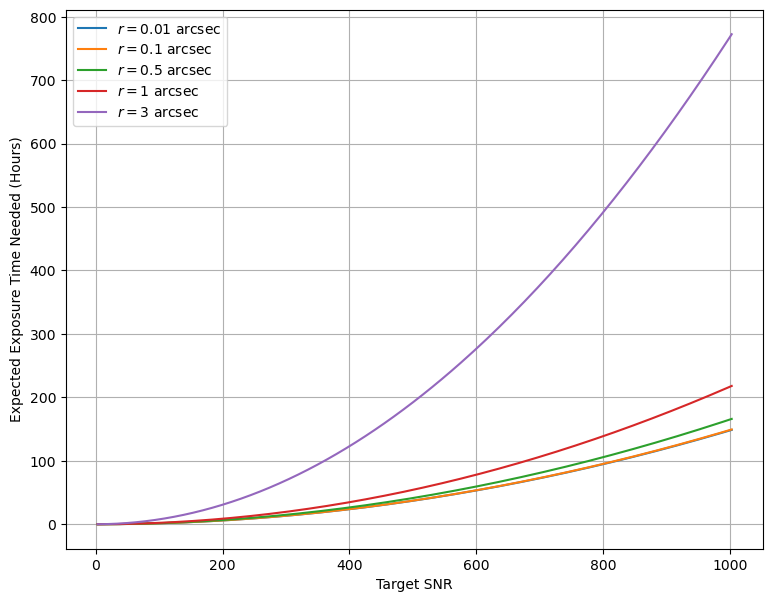

In [7]:
# Run the plotting functions
times = []

SNRs = np.linspace(3, 1003, 200)
r_array = [0.01, 0.1, 0.5, 1, 3]

for r in r_array:
    time_array = exposure_time(psf_radius=r, SNR=SNRs)
    times.append(time_array)

plt.figure(figsize=(9,7))

for r, time_array in zip(r_array, times):
    plt.plot(SNRs, time_array/3600, label=f'$r = {r}$ arcsec')

plt.xlabel('Target SNR')
plt.ylabel('Expected Exposure Time Needed (Hours)')

plt.legend()
plt.grid()
plt.show()

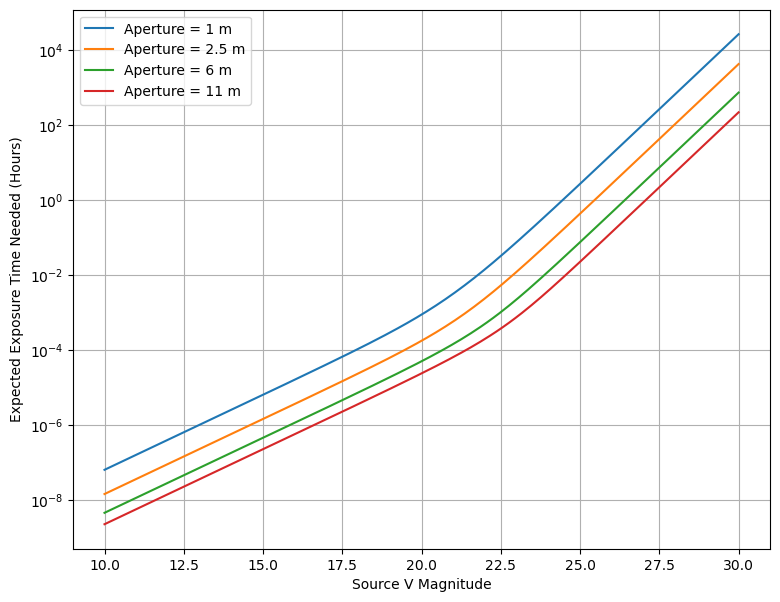

In [8]:
times = []

Vs = np.linspace(10, 30, 200)
D_array = [1, 2.5, 6, 11]

for D in D_array:
    time_array = exposure_time(source_mag=Vs, aperture=D)
    times.append(time_array)

plt.figure(figsize=(9,7))

for D, time_array in zip(D_array, times):
    plt.plot(Vs, time_array/3600, label=f'Aperture = {D} m')

plt.xlabel('Source V Magnitude')
plt.ylabel('Expected Exposure Time Needed (Hours)')

plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

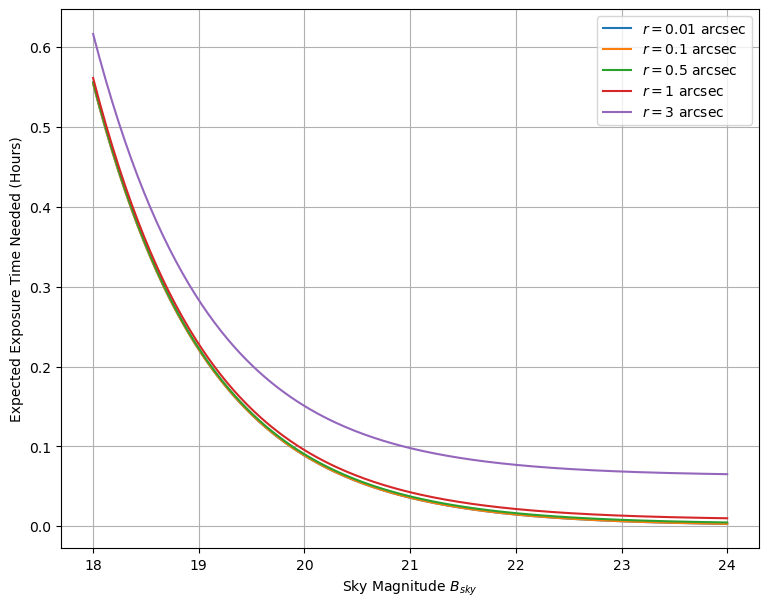

In [9]:
times = []

B_skys = np.linspace(18, 24, 200)
r_array = [0.01, 0.1, 0.5, 1, 3]

for r in r_array:
    time_array = exposure_time(sky_mag=B_skys, psf_radius=r)
    times.append(time_array)

plt.figure(figsize=(9,7))

for r, time_array in zip(r_array, times):
    plt.plot(B_skys, time_array/3600, label=f'$r = {r}$ arcsec')

plt.xlabel('Sky Magnitude $B_{sky}$')
plt.ylabel('Expected Exposure Time Needed (Hours)')

# plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

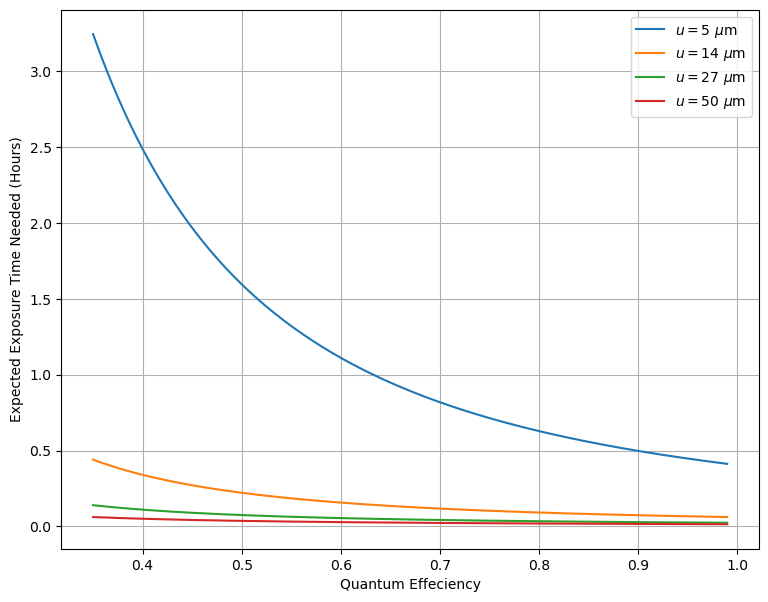

In [10]:
times = []

qs = np.linspace(0.35, 0.99, 200)
u_array = [5, 14, 27, 50]

for u in u_array:
    time_array = np.array([exposure_time(quantum_efficiency=q, pixel_size=u) for q in qs])
    times.append(time_array)

plt.figure(figsize=(9,7))

for u, time_array in zip(u_array, times):
    plt.plot(qs, time_array/3600, label=f'$u = {u}~\mu$m')

plt.xlabel('Quantum Effeciency')
plt.ylabel('Expected Exposure Time Needed (Hours)')

# plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

In [11]:
def exposure_time_extended(source_mag=V,
                        reference_flux=f0,
                        aperture=D,
                        bandwidth=bandwidth,
                        quantum_efficiency=q,
                        sky_mag=B_sky,
                        pixel_size=u,
                        psf_radius=r,
                        focal_ratio=f_number,
                        S_dc=S_dc,
                        S_ro2=S_ro2,
                        SNR=SNR_target,
                        num_pixels=4):
    
    S_sig = magn2elec_perpix(magnitude=source_mag,
                                        reference_flux=reference_flux,
                                        pixel_size=pixel_size,
                                        psf_radius=psf_radius,
                                        focal_ratio=focal_ratio,
                                        quantum_efficiency=quantum_efficiency,
                                        bandwidth=bandwidth)
    
    S_sig = S_sig * num_pixels
    
    S_sky = magn2elec_perpix(magnitude=sky_mag,
                                        reference_flux=reference_flux,
                                        pixel_size=pixel_size,
                                        psf_radius=psf_radius,
                                        focal_ratio=focal_ratio,
                                        quantum_efficiency=quantum_efficiency,
                                        bandwidth=bandwidth)
    R_sky = S_sky * num_pixels
    S_dc = S_dc * num_pixels
    
    time_dep_noise = S_sig + R_sky + S_dc
    return SNR * ((SNR * time_dep_noise + np.sqrt(SNR**2 * time_dep_noise**2 + 4 * S_sig**2 * S_ro2 * num_pixels)) / (2 * S_sig**2))


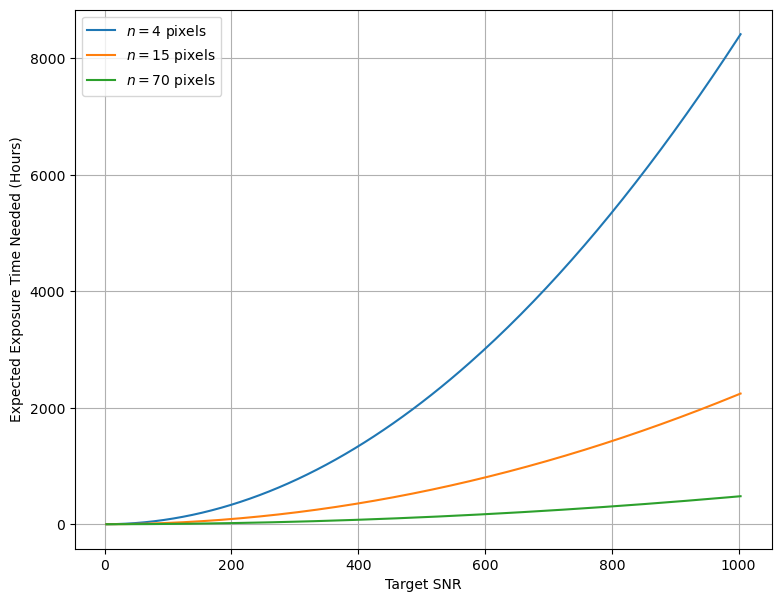

In [12]:
times = []

SNRs = np.linspace(3, 1003, 200)
n_array = [4, 15, 70]

for n in n_array:
    time_array = exposure_time_extended(SNR=SNRs, num_pixels=n)
    times.append(time_array)

plt.figure(figsize=(9,7))

for n, time_array in zip(n_array, times):
    plt.plot(SNRs, time_array/3600, label=f'$n = {n}$ pixels')

plt.xlabel('Target SNR')
plt.ylabel('Expected Exposure Time Needed (Hours)')

plt.legend()
plt.grid()
plt.show()

## **Task 2 – Exposure Time for Andromeda (M31)**

In this part, we calculate the exposure time needed to observe the Andromeda Galaxy (M31) using the Milanković telescope with the SBIG STXL-6303E CCD camera.

We treat M31 as a point source. Required signal-to-noise ratio (SNR) is **100**, and the sky brightness is given as:

- **Bsky = 19 mag/arcsec²**

Based on the telescope and camera specs:

- Apparent magnitude of M31: **V = 3.44**
- Seeing (PSF radius): **r = 0.7 arcsec**
- Telescope diameter: **D = 1.4 m**
- Telescope f-number: **f/# = 8**
- CCD read-out noise: **Sro = 15 e⁻/pix**
- CCD pixel size: **u = 9 µm**
- CCD quantum efficiency: **q = 0.68**
- CCD dark current: **Sdc = 0.5 e⁻/s/pix**

We'll plug these into the same model as before to get the exposure time needed to reach the required SNR.

In [13]:
milankovic_pixel_scale = ((206265 * 9 * 1E-6) / 11.2)**2
andromeda_sky_area = 10680*3780 # arcsec^2
andromeda_num_pixels = andromeda_sky_area / milankovic_pixel_scale

print(f'Andromeda would cover around {int(andromeda_num_pixels):,} pixels on the CCD in total if the CCD was big enough.')


Andromeda would cover around 1,469,477,689 pixels on the CCD in total if the CCD was big enough.


In [14]:
# New parameters
D = 1.4  # Mirror diameter in meters
q = 0.68  # Quantum efficiency
V = 3.4  # Magnitude of the object
f_number = 8  # f/#
S_dc = 0.3  # Dark current in e-/s/pix
B_sky = 19  # Sky brightness in mag/arcsec^2
S_ro2 = 11  # Read-out noise in e-/pix
r = 2  # PSF radius in arcseconds
u = 9  # Pixel size in micrometers
SNR_target = 100  # Target signal-to-noise ratio
f0 = 1000  # Flux for a zero-mag7689nitude source in e-/s/cm^2/Å
bandwidth = 900  # V-filter bandwidth in Å
X = 1  # Zenith factor

In [15]:
exposure_time_extended(source_mag=V,
                    reference_flux=f0,
                    aperture=D,
                    bandwidth=bandwidth,
                    quantum_efficiency=q,
                    sky_mag=B_sky,
                    pixel_size=u,
                    psf_radius=r,
                    focal_ratio=f_number,
                    S_dc=S_dc,
                    S_ro2=S_ro2,
                    SNR=SNR_target,
                    num_pixels=3072*2048)

1.4795969673392683e-07

## References

1. Bolte, M. (2006). *Signal-to-noise in Optical Astronomy*.  
   [http://www.ucolick.org/~bolte/AY257/s_n.pdf](http://www.ucolick.org/~bolte/AY257/s_n.pdf)

2. Massey, P., Armandroff, T., De Veny, J., Claver, C., Harmer, C., Jacoby, G., Schoening, B., Silva, D. (2002).  
   *Direct Imaging Manual for Kitt Peak*.  
   [https://www.noao.edu/kpno/manuals/dim/#ccdtime](https://www.noao.edu/kpno/manuals/dim/#ccdtime)

3. *Optimum Exposures*.  
   [https://starizona.com/acb/ccd/advtheoryexp.aspx](https://starizona.com/acb/ccd/advtheoryexp.aspx)

4. *Imaging with CCDs*.  
   [http://123.physics.ucdavis.edu/week_7_files/CCD_imaging_lecture.pdf](http://123.physics.ucdavis.edu/week_7_files/CCD_imaging_lecture.pdf)

5. *CCD Signal-To-Noise Ratio*.  
   [https://www.microscopyu.com/tutorials/ccd-signal-to-noise-ratio](https://www.microscopyu.com/tutorials/ccd-signal-to-noise-ratio)

6. Ilić, D. *Lecture Notes* (provided in class).

## Appendix

One of the more effective ways to increase the SNR value is by stacking multiple shorterexposure
images and averaging them. In this way, since the signal from the object of interest
remains constant while the noise is random, averaging leads to an increase in SNR proportional
to the sqrt(N), where N is the number of images averaged. This method allows for a more
efficient and quicker way to obtain a higher-quality image, thereby reducing observational
errors. Additionally, there are other averaging techniques to eliminate certain types of noise.
Aside from averaging, one can also calculate the median of the images or use sigma-clipping,
which eliminates pixels with extreme values (hot and cold pixels caused by camera defects).
Each method has its advantages and disadvantages, but the first method (simple averaging) is
most used.




